<a href="https://colab.research.google.com/github/lht99/tele-bot/blob/main/New_SVM%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_excel("SVM_data.xlsx")

In [ ]:
df

,Unnamed: 0,Unnamed: 1,350,400,450
0,Ethanol,1,210.37751,30.94001,2.84326
1,NaN,2,210.53153,30.95750,2.84338
2,NaN,3,210.70669,30.99827,2.84345
3,NaN,4,210.85292,31.01032,2.84298
4,NaN,5,211.01399,31.00241,2.84560
...,...,...,...,...,...
145,NaN,26,1.43882,1.34129,1.16868
146,NaN,27,1.44017,1.33958,1.16658
147,NaN,28,1.45302,1.33152,1.15722
148,NaN,29,1.45689,1.32986,1.15961


In [ ]:
shuffled_df = shuffle(df)
shuffled_df

,Unnamed: 0,Unnamed: 1,350,400,450
63,NaN,4,4.78730,6.23249,3.77441
93,NaN,4,1.55020,1.42212,1.44305
108,NaN,19,1.53496,1.42989,1.43507
102,NaN,13,1.52672,1.41750,1.43648
26,NaN,27,213.53569,31.61323,2.87445
...,...,...,...,...,...
140,NaN,21,1.45873,1.31397,1.15513
32,NaN,3,215.79671,37.52128,9.08900
43,NaN,14,217.37599,37.88510,9.19835
2,NaN,3,210.70669,30.99827,2.84345


In [ ]:
X = shuffled_df.iloc[:, 0:-1]
X

,Unnamed: 0,Unnamed: 1,350,400
63,NaN,4,4.78730,6.23249
93,NaN,4,1.55020,1.42212
108,NaN,19,1.53496,1.42989
102,NaN,13,1.52672,1.41750
26,NaN,27,213.53569,31.61323
...,...,...,...,...
140,NaN,21,1.45873,1.31397
32,NaN,3,215.79671,37.52128
43,NaN,14,217.37599,37.88510
2,NaN,3,210.70669,30.99827


In [ ]:
y = shuffled_df.iloc[:,-1]
y

63     3.77441
93     1.44305
108    1.43507
102    1.43648
26     2.87445
        ...   
140    1.15513
32     9.08900
43     9.19835
2      2.84345
50     9.35465
Name: 450, Length: 150, dtype: float64

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1, 10], 
          'gamma' : [0.001, 0.01, 0.1, 1],
          'kernel': ['linear','rbf','poly']}

In [ ]:
svm_clf = svm.SVC()        
svm_grid = GridSearchCV(svm_clf,param_grid=params) # hyperparameter tuning model
svm_model = svm_grid.fit(X_train,y_train)

print('Best Hyper Parameters :\n',svm_model.best_params_)

train_pred = svm_grid.predict(X_train) # get predicitions on train set
test_pred = svm_grid.predict(X_test) # get predictions on test set (validation set)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print('Accuracy of Baseline SVM Model on Training Set : ', train_acc * 100, '%')
print('Accuracy of Baseline SVM Model on Validation Set : ', test_acc * 100, '%')

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/

ValueError: ignored

In [ ]:
y_test

array([1.15651, 9.16668, 1.15938, 3.76899, 9.42149, 9.37652, 3.7633 ,
       3.76884, 3.7545 , 2.83448, 2.85145, 3.77528, 1.15805, 1.16411,
       2.86411, 9.20769, 1.45307, 1.43507, 2.83829, 2.85259, 1.44629,
       1.15389, 1.15722, 2.84031, 1.43879, 1.16245, 9.10331, 1.15575,
       9.14992, 1.16076])

In [ ]:
test_pred

NameError: ignored

In [ ]:
X_test

array([[nan, 16, 1.45905, 1.33198],
       [nan, 11, 217.09261, 37.79812],
       [nan, 10, 1.42035, 1.30911],
       [nan, 20, 4.74245, 6.22302],
       [nan, 27, 218.69405, 38.08871],
       [nan, 29, 218.98317, 38.16335],
       [nan, 10, 4.81205, 6.22589],
       [nan, 8, 4.79275, 6.23525],
       [nan, 29, 4.67777, 6.18679],
       [nan, 13, 212.24132, 31.12333],
       [nan, 20, 212.68581, 31.35989],
       [nan, 15, 4.79456, 6.22467],
       [nan, 9, 1.42576, 1.31389],
       [nan, 25, 1.43703, 1.34183],
       [nan, 24, 213.10729, 31.51081],
       [nan, 15, 217.61047, 37.91619],
       [nan, 30, 1.57017, 1.45307],
       [nan, 19, 1.53496, 1.42989],
       [nan, 15, 212.47767, 31.17806],
       [nan, 21, 212.78793, 31.39471],
       [nan, 3, 1.55236, 1.41672],
       [nan, 15, 1.44072, 1.31258],
       [nan, 28, 1.45302, 1.33152],
       [nan, 16, 212.46605, 31.21005],
       [nan, 20, 1.53242, 1.42647],
       [nan, 19, 1.46944, 1.31646],
       [nan, 5, 216.11143, 37.59011],

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
labels = ["Ethanol", "Acetone", "NH3", "H2", "CO"]
colors = ["blue", "orange", "green", "#D12B60", "purple"]

TypeError: ignored

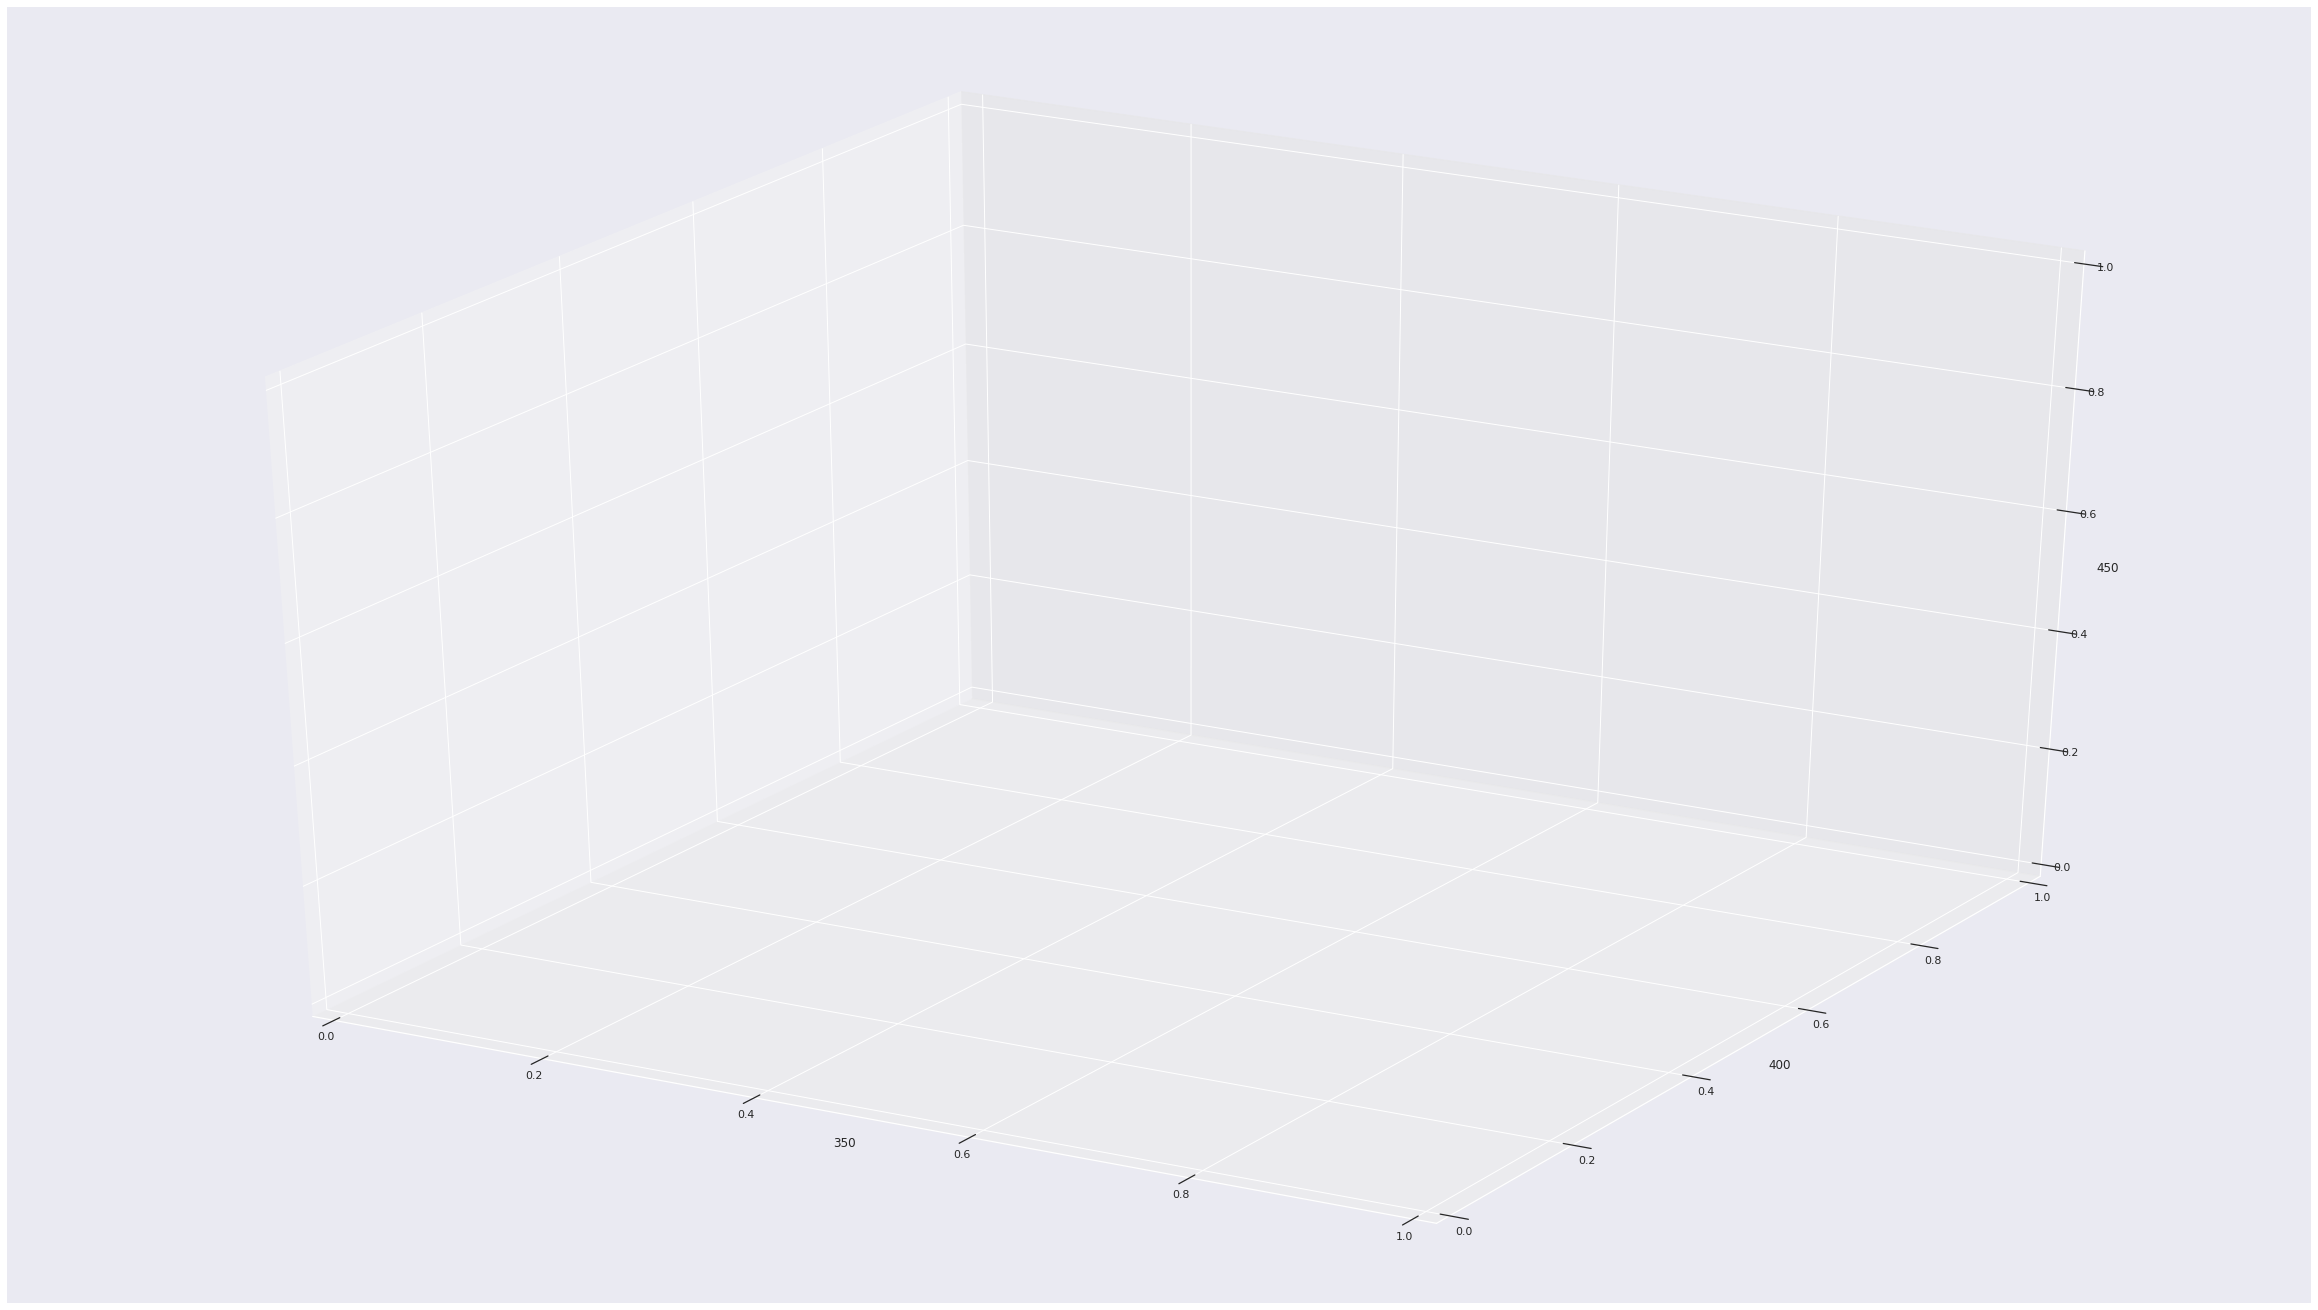

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X[np.where(y == C)][:,1]
    y_point = X[np.where(y == C)][:,2]
    z_point = X[np.where(y == C)][:,3]
    
    ax.set_xlabel("350")
    ax.set_ylabel("400")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm1.png')

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X[np.where(y == C)][:,0]
    y_point = X[np.where(y == C)][:,1]
    z_point = X[np.where(y == C)][:,2]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("350")
    ax.set_zlabel("400")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm2.png')

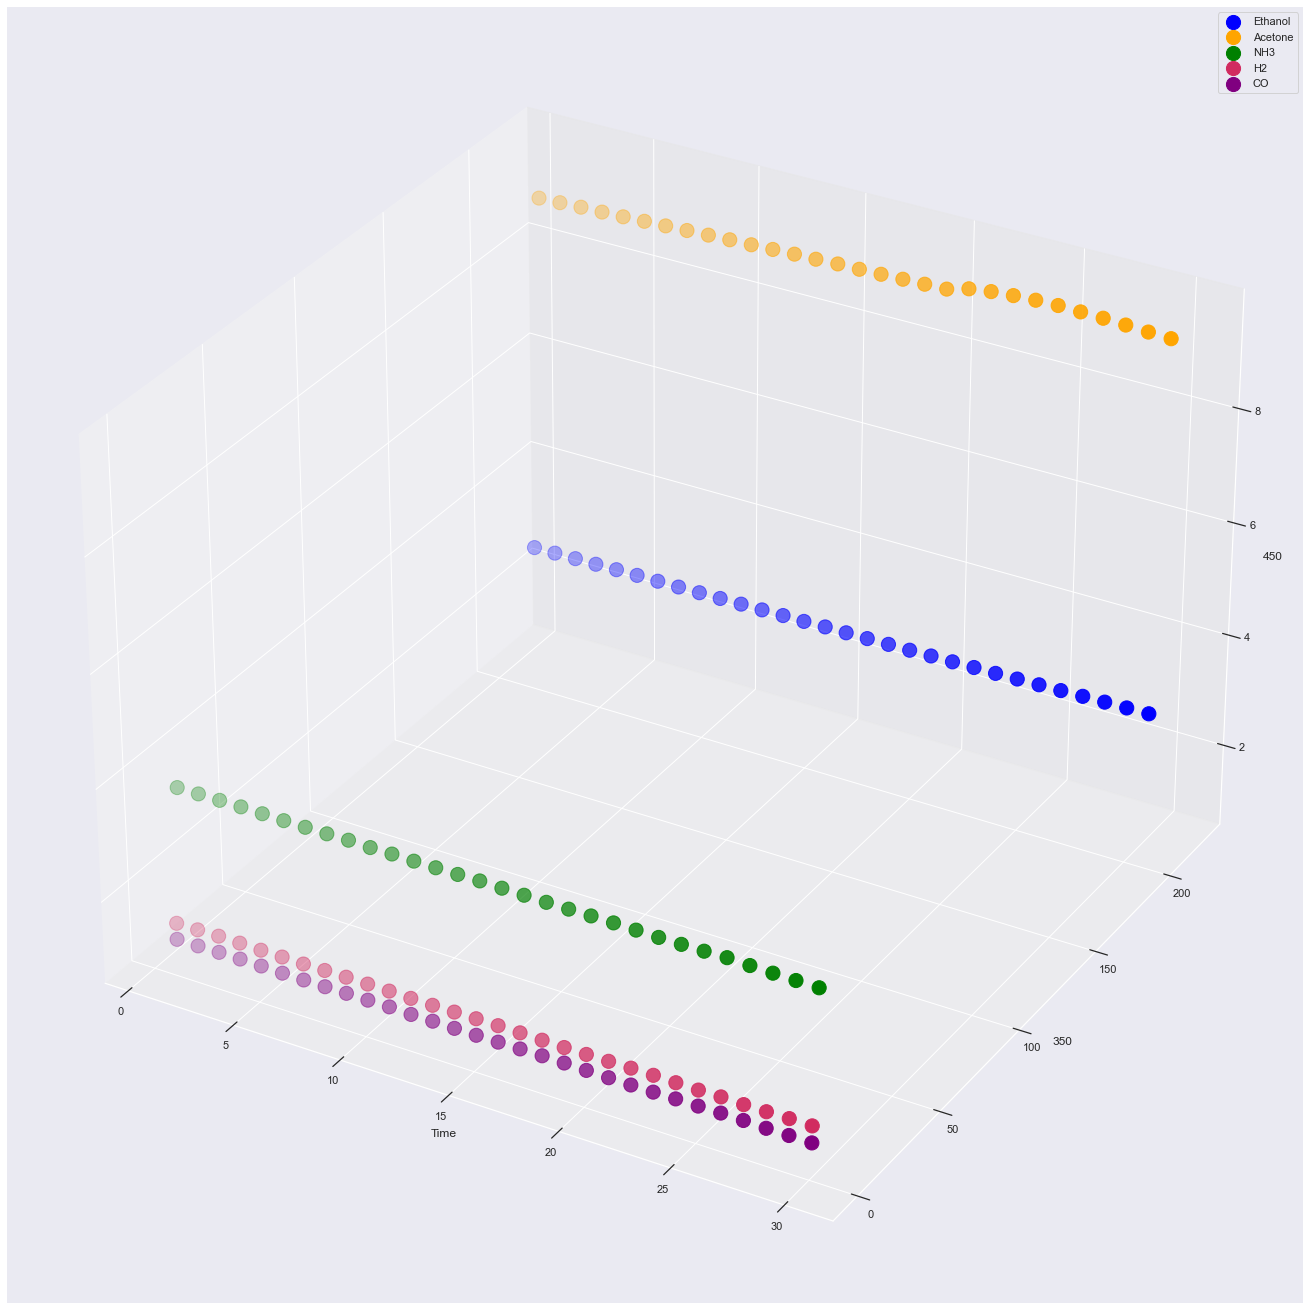

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X[np.where(y == C)][:,0]
    y_point = X[np.where(y == C)][:,1]
    z_point = X[np.where(y == C)][:,3]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("350")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm3.png')

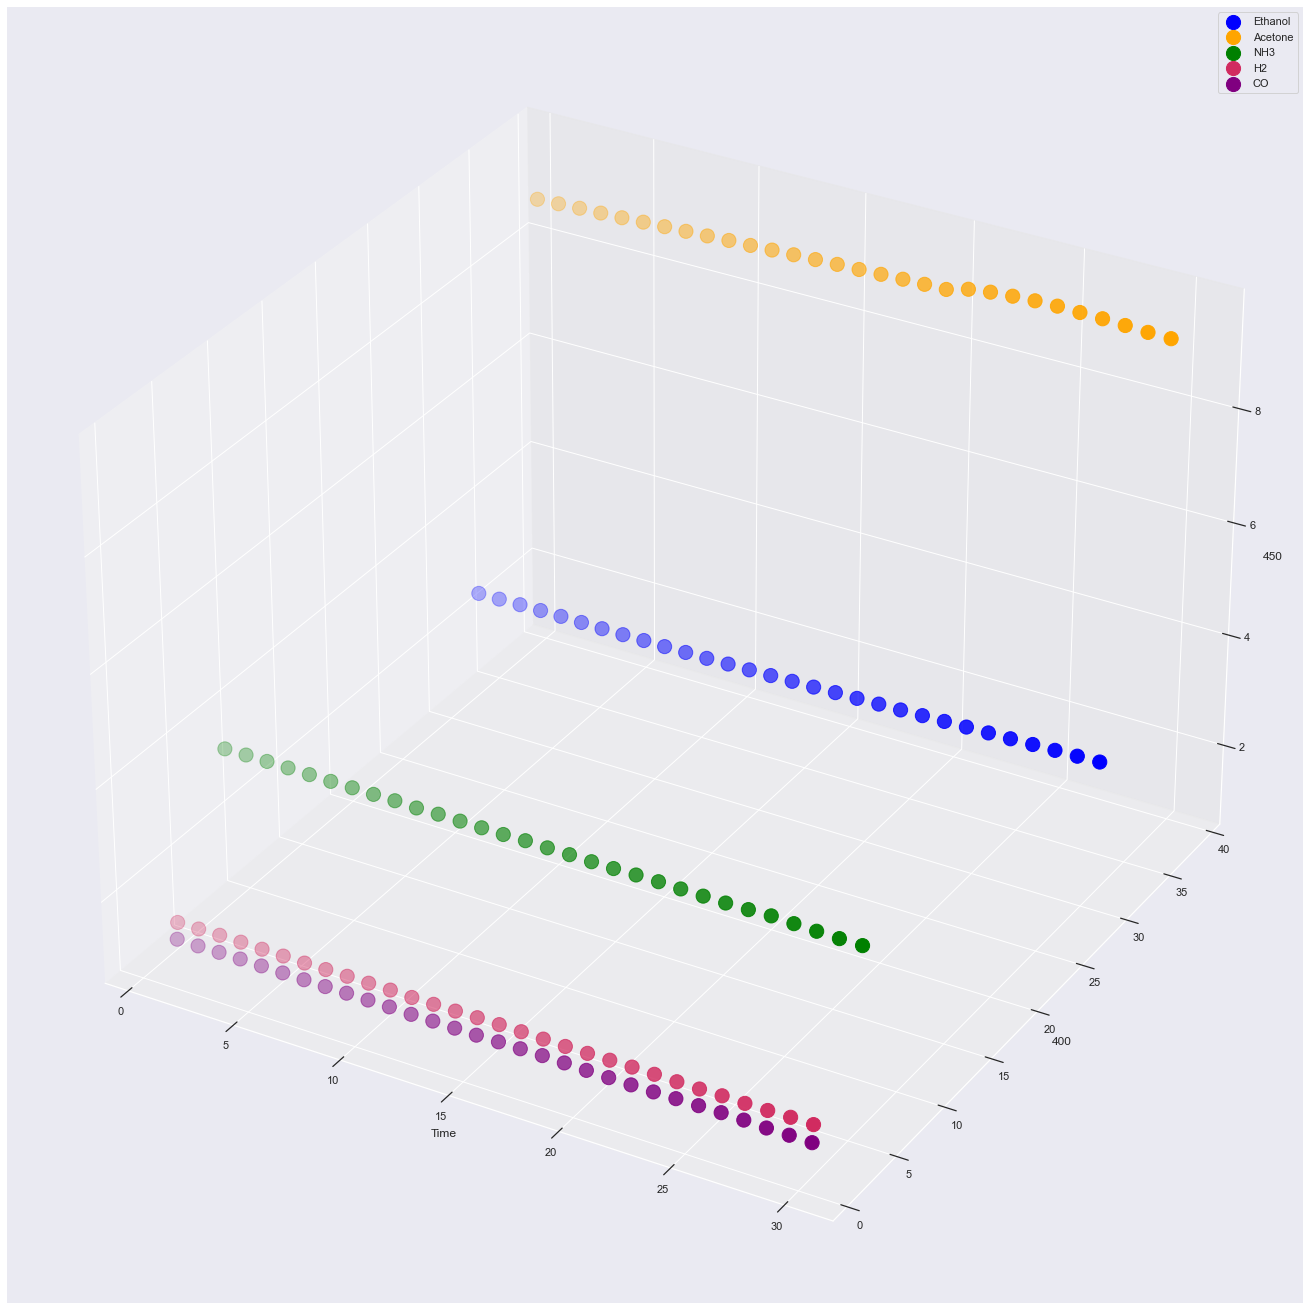

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X[np.where(y == C)][:,0]
    y_point = X[np.where(y == C)][:,2]
    z_point = X[np.where(y == C)][:,3]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("400")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm4.png')

### SVM with scaled data

In [ ]:
X_transformed = StandardScaler().fit_transform(X)
X_transformed

array([[ 1.44417822, -0.82637251, -0.90238663, -0.76574404],
       [ 0.75097267, -0.82716227, -0.91046297, -0.8653836 ],
       [-1.32864396, -0.82723842, -0.91088318, -0.86354631],
       [ 0.86650693, -0.82622713, -0.90378479, -0.76469417],
       [-1.67524673,  1.18159888,  0.9756092 , -0.28933466],
       [ 0.75097267, -0.82636347, -0.9035333 , -0.76461918],
       [ 1.2131097 ,  1.25995138,  1.42842162,  1.95757117],
       [-1.2131097 ,  1.18771851,  0.97958211, -0.28853702],
       [ 0.98204119, -0.82607954, -0.90372812, -0.76618036],
       [-1.2131097 , -0.79513631, -0.59710033,  0.02667519],
       [-0.51990416, -0.82745513, -0.91175544, -0.86215556],
       [-0.28883564, -0.82736697, -0.91089209, -0.86455528],
       [-0.28883564, -0.79499728, -0.59788281,  0.02524354],
       [ 1.67524673, -0.82703583, -0.90967539, -0.86379515],
       [-0.05776713, -0.82631876, -0.90347026, -0.76584971],
       [ 1.44417822,  1.21335524,  1.0207081 , -0.27759171],
       [ 0.51990416, -0.

In [ ]:
# df_X = StandardScaler().fit_transform(df.iloc[:, 0:-1])

In [ ]:
# X_Scaled = pd.DataFrame(data = df_X
#              , columns = ['Time', '350', '400', '450'])
# X_Scaled

In [ ]:
# concat_df = pd.concat([X_Scaled, df.iloc[:,-1]], axis=1)
# concat_df

In [ ]:
# concat_df.to_excel("SVM_scaled.xlsx")

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=4)

In [ ]:
svm_model_2 = svm_grid.fit(X_scaled_train,y_train)

print('Best Hyper Parameters :\n',svm_model.best_params_)

train_scaled_pred = svm_model_2.predict(X_scaled_train) # get predicitions on train set
test_scaled_pred = svm_model_2.predict(X_scaled_test) # get predictions on test set (validation set)

train_scaled_acc = accuracy_score(y_train, train_scaled_pred)
test_scaled_acc = accuracy_score(y_test, test_scaled_pred)

print('Accuracy of Baseline SVM Model on Training Set : ', train_scaled_acc * 100, '%')
print('Accuracy of Baseline SVM Model on Validation Set : ', test_scaled_acc * 100, '%')

Best Hyper Parameters :
 {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Accuracy of Baseline SVM Model on Training Set :  100.0 %
Accuracy of Baseline SVM Model on Validation Set :  100.0 %


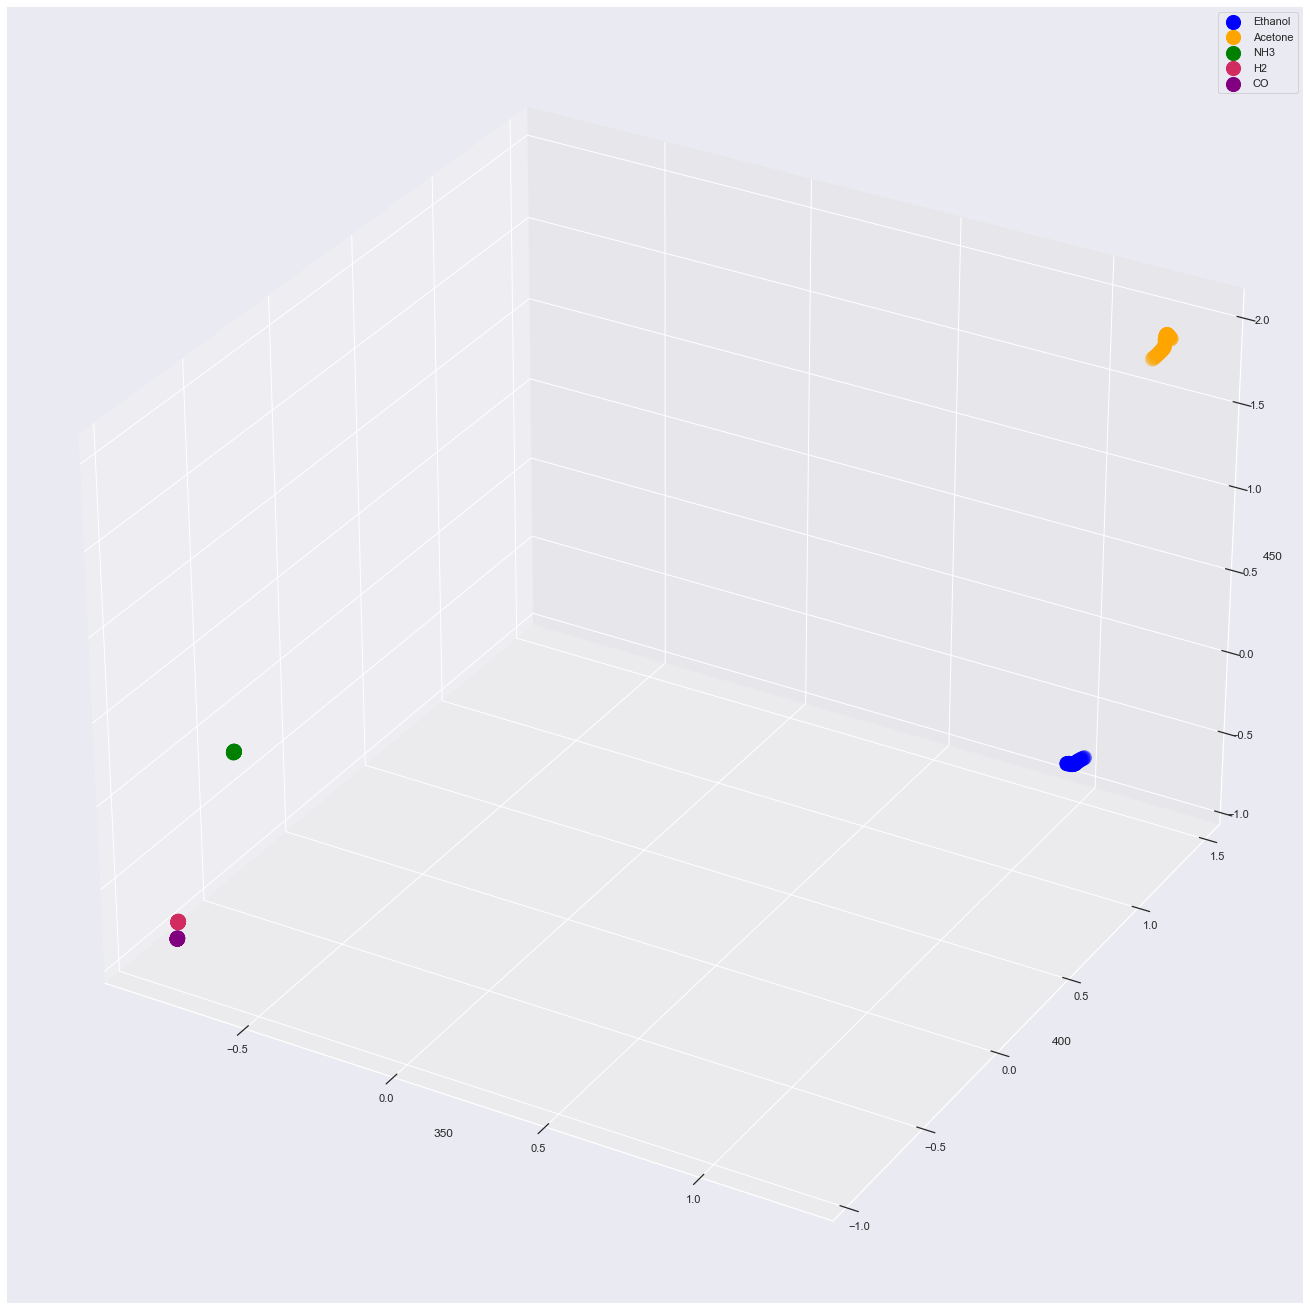

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X_transformed[np.where(y == C)][:,1]
    y_point = X_transformed[np.where(y == C)][:,2]
    z_point = X_transformed[np.where(y == C)][:,3]
    
    ax.set_xlabel("350")
    ax.set_ylabel("400")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm_scaled_1.png')

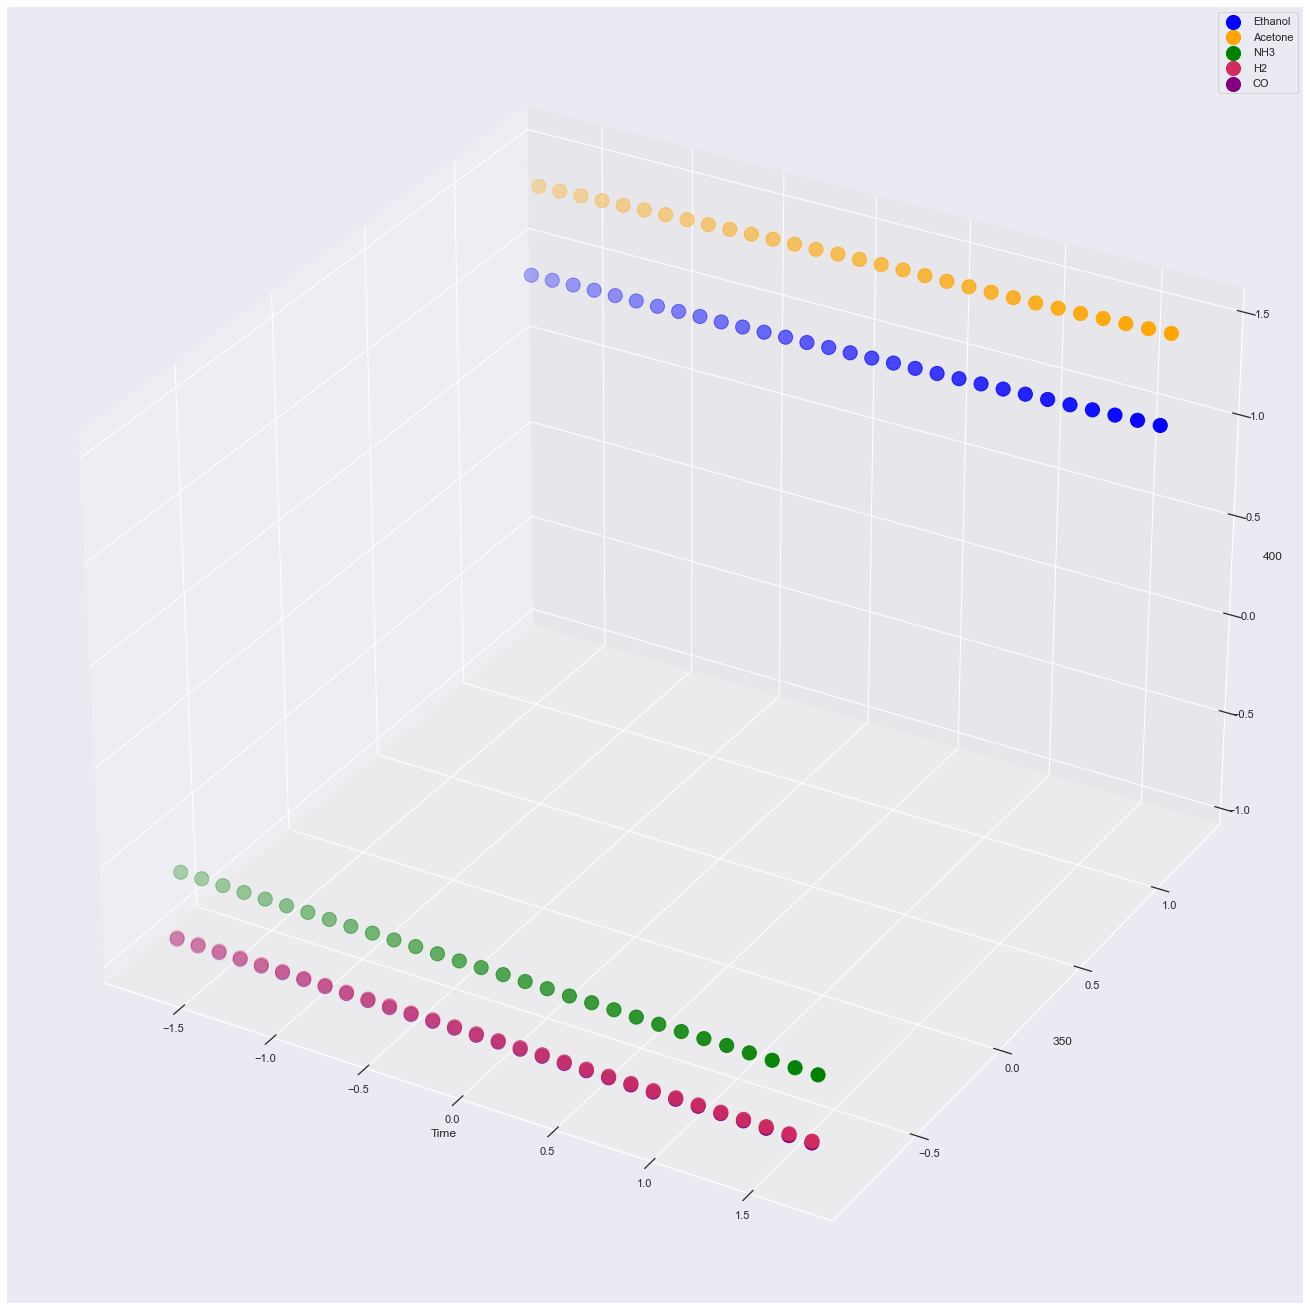

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X_transformed[np.where(y == C)][:,0]
    y_point = X_transformed[np.where(y == C)][:,1]
    z_point = X_transformed[np.where(y == C)][:,2]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("350")
    ax.set_zlabel("400")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm_scaled_2.png')

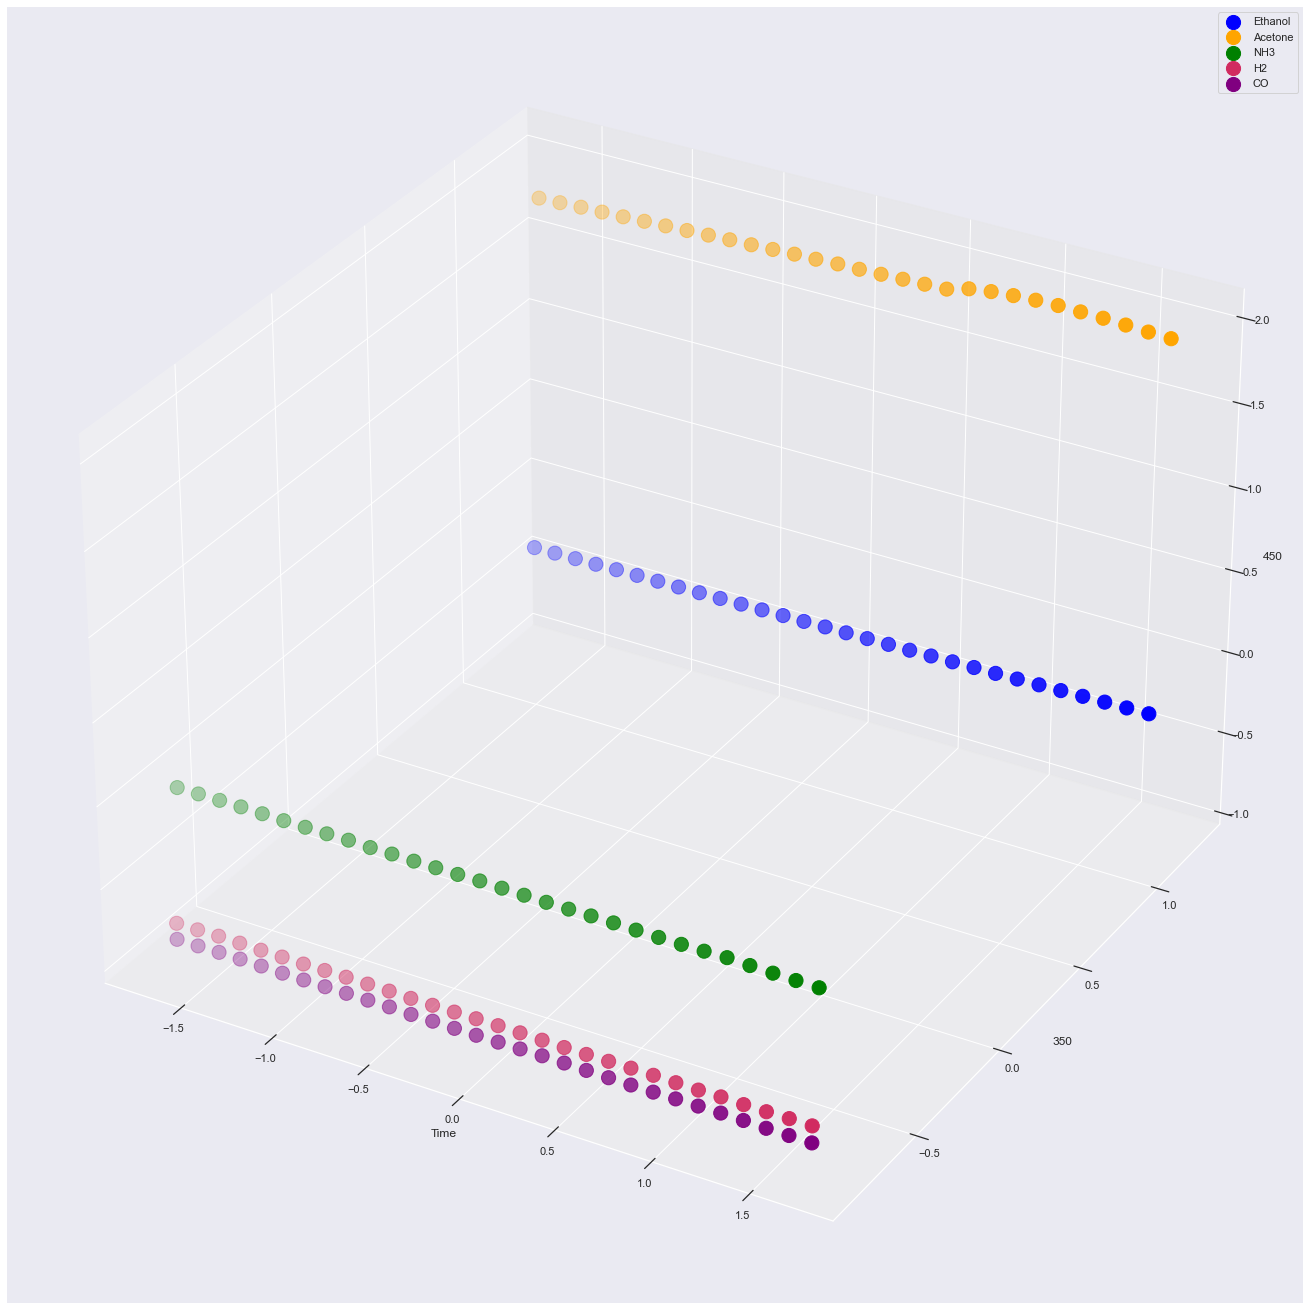

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X_transformed[np.where(y == C)][:,0]
    y_point = X_transformed[np.where(y == C)][:,1]
    z_point = X_transformed[np.where(y == C)][:,3]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("350")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm_scaled_3.png')

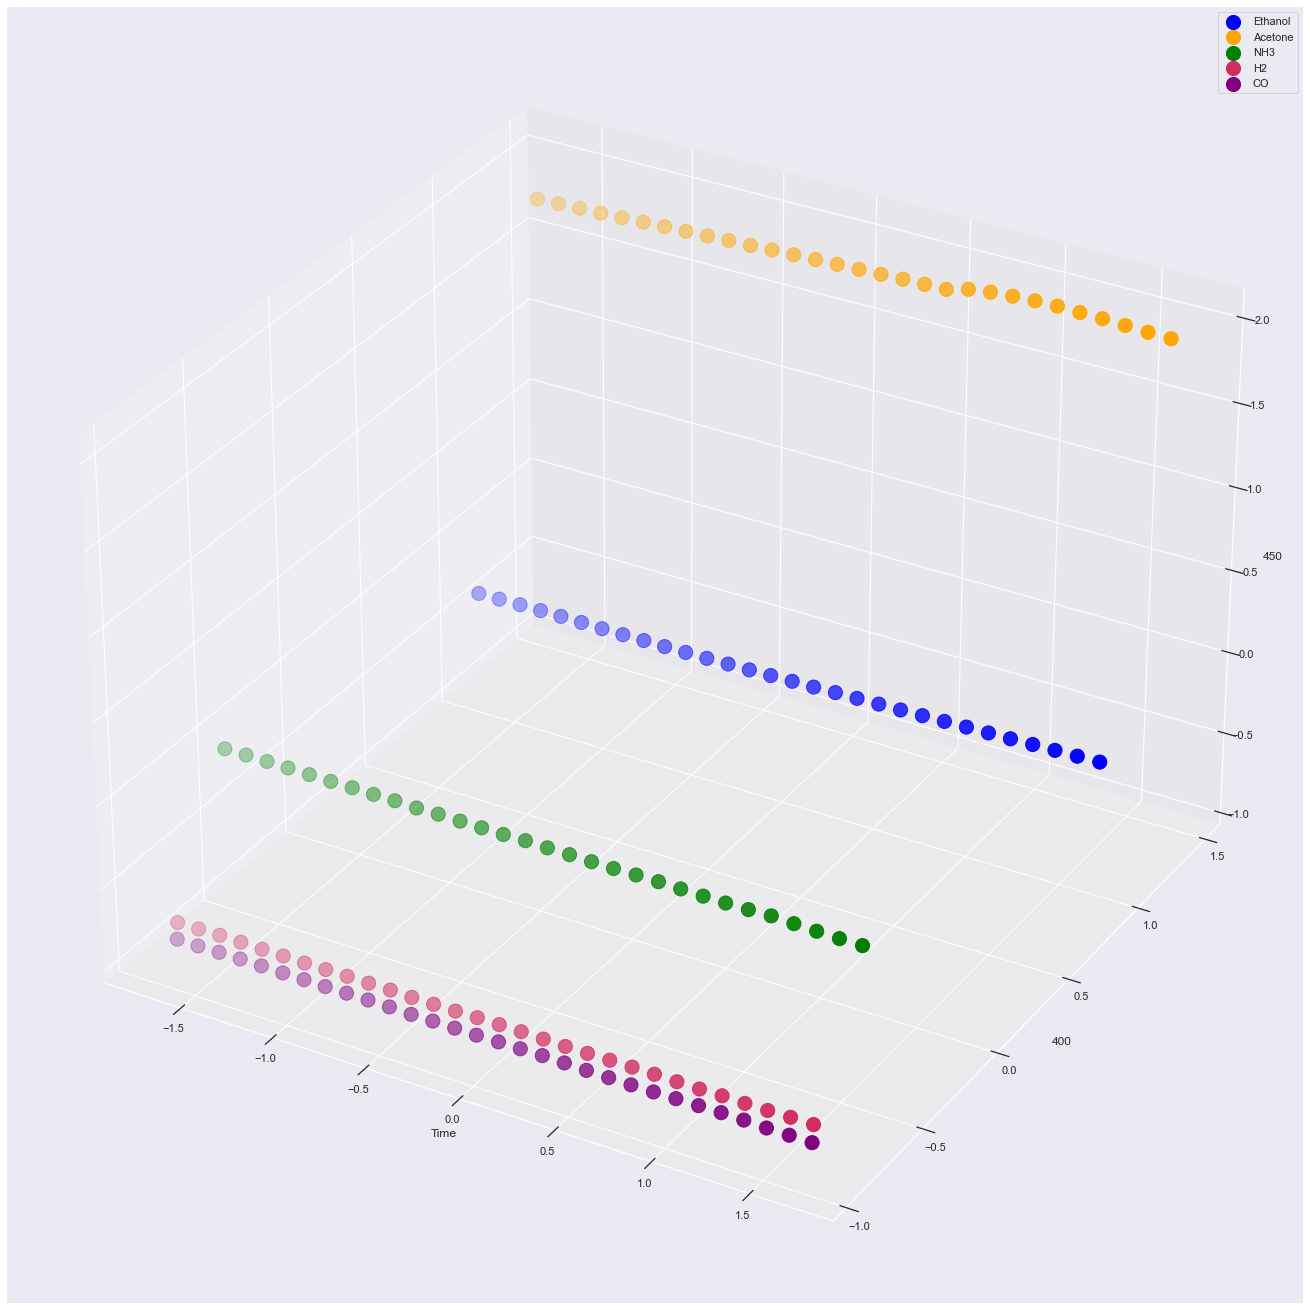

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = X_transformed[np.where(y == C)][:,0]
    y_point = X_transformed[np.where(y == C)][:,2]
    z_point = X_transformed[np.where(y == C)][:,3]
    
    ax.set_xlabel("Time")
    ax.set_ylabel("400")
    ax.set_zlabel("450")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
    ax.legend()
fig.savefig('svm_scaled_4.png')

## PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pca = PCA()

In [ ]:
X_transformed = StandardScaler().fit_transform(X)

In [ ]:
pca.fit_transform(X_transformed)

array([[-1.43372194e+00, -1.45339213e+00,  1.47744066e-02,
        -3.28973129e-02],
       [-1.49652236e+00, -7.60038909e-01,  9.06147974e-02,
        -2.32291745e-02],
       [-1.50928753e+00,  1.31947689e+00,  7.44963745e-02,
        -2.28197414e-02],
       [-1.43766402e+00, -8.75755697e-01,  9.60416050e-03,
        -3.39341238e-02],
       [ 1.12540683e+00,  1.68992311e+00,  1.05615589e+00,
         1.75920875e-02],
       [-1.43829787e+00, -7.60226499e-01,  8.73613246e-03,
        -3.36159242e-02],
       [ 2.65979338e+00, -1.20043467e+00, -6.44308285e-01,
        -3.01396846e-02],
       [ 1.13484008e+00,  1.22787229e+00,  1.06270724e+00,
         1.63129053e-02],
       [-1.43758549e+00, -9.91279930e-01,  1.17325556e-02,
        -3.38168403e-02],
       [-8.25508045e-01,  1.20383075e+00, -5.71805777e-01,
         5.90205470e-02],
       [-1.50398094e+00,  5.10764091e-01,  7.86259444e-02,
        -2.39138154e-02],
       [-1.50318446e+00,  2.79716776e-01,  8.24937248e-02,
      

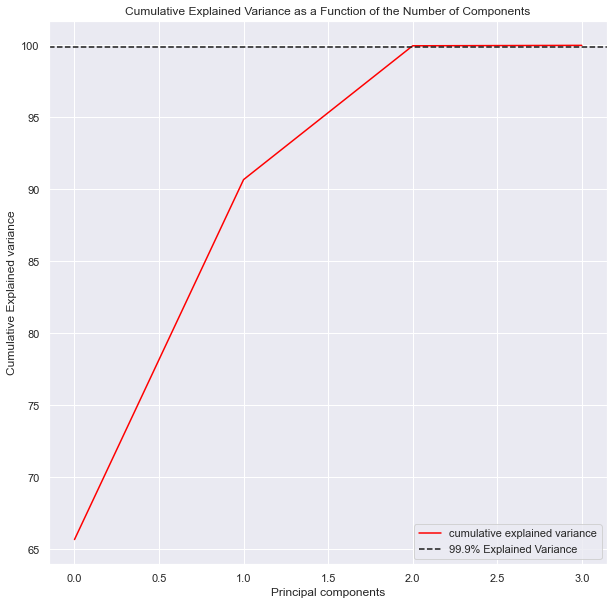

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 99.9, color='k', linestyle='--', label = '99.9% Explained Variance')
plt.legend(loc='best')

In [ ]:
pca = PCA(n_components=4, svd_solver='full')
principalComponents = pca.fit_transform(X_transform)
principalComponents.shape

(150, 4)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4'])

In [ ]:
principalDf

NameError: ignored

In [ ]:
final = pd.concat([principalDf, df.iloc[:,-1]], axis=1)
final

NameError: ignored

In [ ]:
final.to_excel("PCA_processed.xlsx")

In [ ]:
PC_X = principalDf.to_numpy()

NameError: ignored

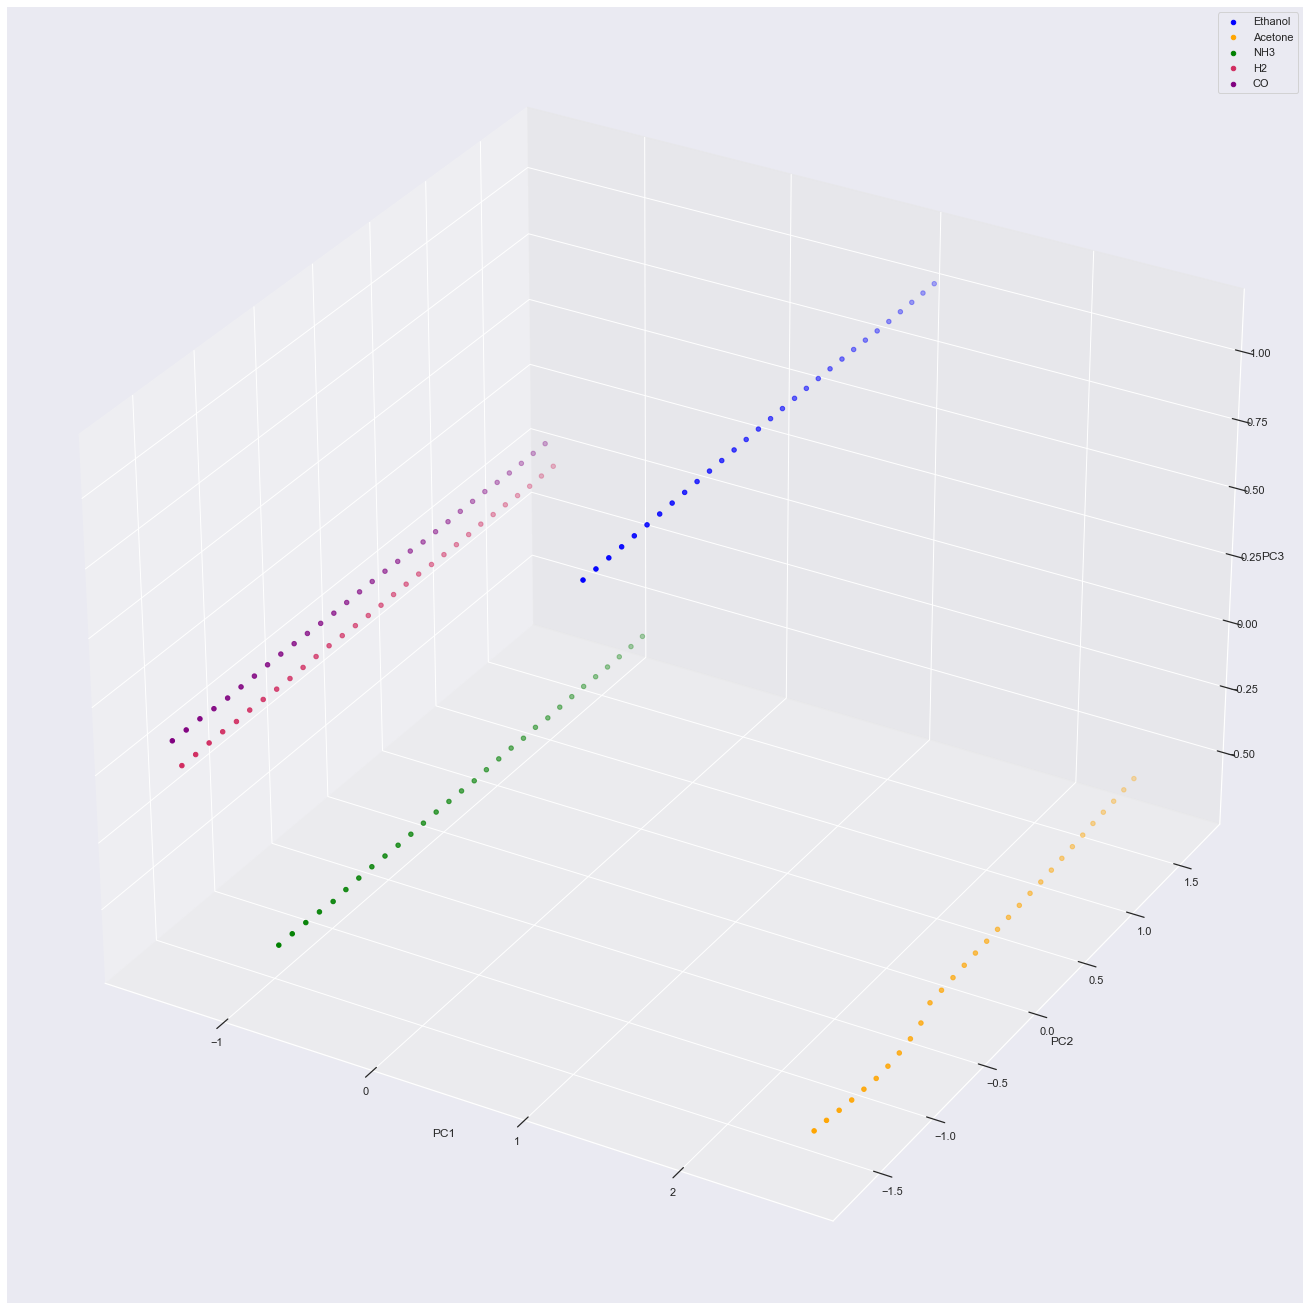

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = PC_X[np.where(y == C)][:,0]
    y_point = PC_X[np.where(y == C)][:,1]
    z_point = PC_X[np.where(y == C)][:,2]
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C])
ax.legend()
fig.savefig('pca-PC-1-2-3.png')

In [ ]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = PC_X[np.where(y == C)][:,1]
    y_point = PC_X[np.where(y == C)][:,2]
    z_point = PC_X[np.where(y == C)][:,3]
    
    ax.set_xlabel("PC2")
    ax.set_ylabel("PC3")
    ax.set_zlabel("PC4")
    ax.scatter(x_point, y_point, z_point, color=colors[C], label=labels[C])
ax.legend()

fig.savefig('PCA-PC-2-3-4.png')

NameError: ignored

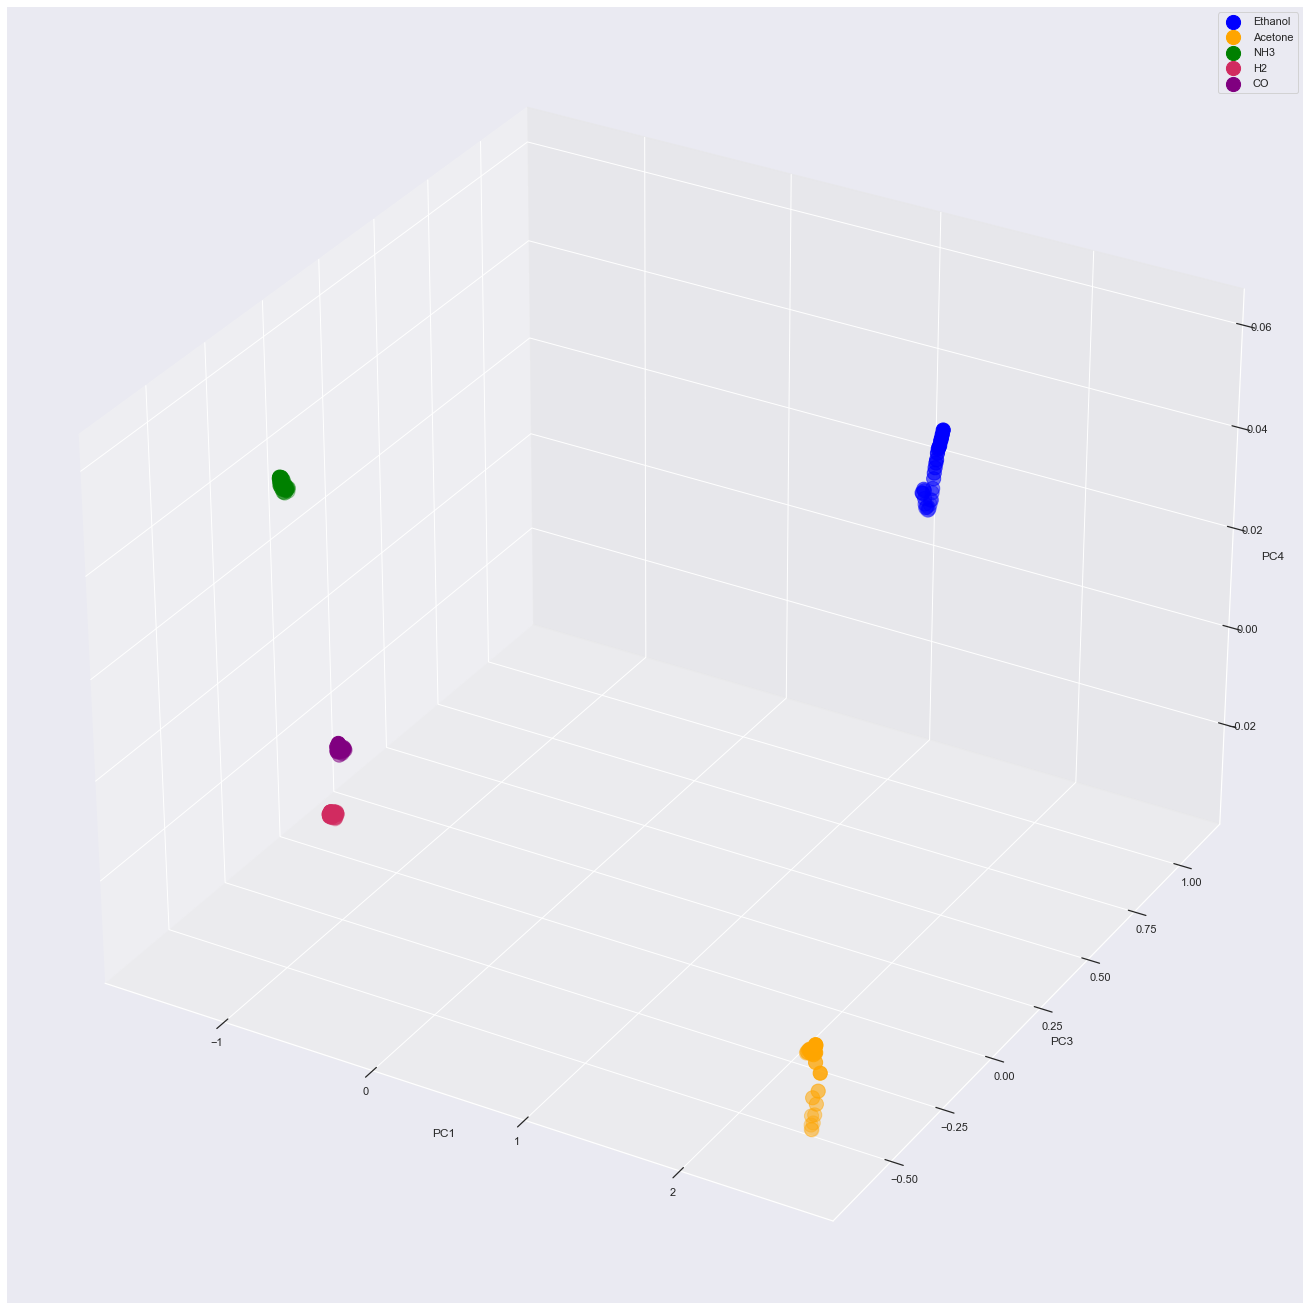

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = PC_X[np.where(y == C)][:,0]
    y_point = PC_X[np.where(y == C)][:,2]
    z_point = PC_X[np.where(y == C)][:,3]
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC3")
    ax.set_zlabel("PC4")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
ax.legend()

fig.savefig('PCA-PC-1-3-4.png')

In [ ]:
fig = plt.figure(figsize=(32,18))
ax = Axes3D(fig)

for C in list(np.unique(y_test)):
    x_point = PC_X[np.where(y == C)][:,0]
    y_point = PC_X[np.where(y == C)][:,1]
    z_point = PC_X[np.where(y == C)][:,3]
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC4")
    ax.scatter(x_point, y_point, z_point, color =colors[C], label=labels[C], s=200)
ax.legend()

fig.savefig('PCA-PC-1-2-4.png')

NameError: ignored